In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import percentileofscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sk
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

file_name = "suicidedataset.csv"
dataset = pd.read_csv(file_name)

#Select the time range from 1995 to 2013
dataset = dataset[dataset.year >= 1995] 
dataset= dataset[dataset.year <= 2013]
dataset.shape

(9984, 26)

In [147]:
dataset1=dataset.rename(columns={'Individuals using the Internet (% of population)':'Internetusers','Expense (% of GDP)':'Expenses',
                                 'Compensation of employees (% of expense)':'EmployeeCompensation','Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment',
                                 'Physicians (per 1,000 people)':'Physicians','Strength of legal rights index (0=weak to 12=strong)':'StrengthofLegalRightsIndex','Life expectancy at birth, total (years)':'LifeExpectancyatBirth',
                                'Mobile cellular subscriptions (per 100 people)':'MobileCellularSubscriptions','Refugee population by country or territory of origin':'Refugee',
                                'Contributing family workers, total (% of total employment) (modeled ILO estimate)':'ContributingFamilyWorkers','Access to electricity (% of population)':'AccesstoElectricity',
                                'Lower secondary completion rate, total (% of relevant age group)':'LowerSecondaryCompletionRate','Labor force, total':'LaborForce'})




In [148]:
dataset1.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,Unemployment,Physicians,StrengthofLegalRightsIndex,LaborForce,LifeExpectancyatBirth,MobileCellularSubscriptions,Refugee,ContributingFamilyWorkers,AccesstoElectricity,LowerSecondaryCompletionRate
120,Argentina,1995,male,75+ years,190,433800,43.80,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
121,Argentina,1995,male,55-74 years,515,2214000,23.26,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
122,Argentina,1995,male,35-54 years,485,3787800,12.80,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
123,Argentina,1995,male,25-34 years,218,2404900,9.06,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN
124,Argentina,1995,male,15-24 years,277,3112100,8.90,Argentina1995,0.731,2.580320e+11,...,18.799999,2.68,NaN,14979213,72.651,1.163986,330.0,1.409,NaN,NaN


In [149]:
print(dataset1.isnull().sum())
print(dataset1.shape)

country                            0
year                               0
sex                                0
age                                0
suicides_no                        0
population                         0
suicidesper100k                    0
country-year                       0
yearlyHDI                       6432
GDPpyear                           0
GDPpcapital                        0
generation                         0
suicide%                           0
Internetusers                    108
Expenses                        1476
EmployeeCompensation            1572
Unemployment                       0
Physicians                      2328
StrengthofLegalRightsIndex      9492
LaborForce                         0
LifeExpectancyatBirth              0
MobileCellularSubscriptions        0
Refugee                          132
ContributingFamilyWorkers          0
AccesstoElectricity              468
LowerSecondaryCompletionRate    5568
dtype: int64
(9984, 26)


In [150]:
dataset1.drop('country-year',axis=1,inplace=True)  #因为既有country又有year，所以这个特征无用
dataset1.drop('yearlyHDI',axis=1,inplace=True)  
dataset1.drop('LowerSecondaryCompletionRate',axis=1,inplace=True)
dataset1.drop('Physicians',axis=1,inplace=True) 
dataset1.drop('StrengthofLegalRightsIndex',axis=1,inplace=True)
dataset1.isnull().sum()

country                           0
year                              0
sex                               0
age                               0
suicides_no                       0
population                        0
suicidesper100k                   0
GDPpyear                          0
GDPpcapital                       0
generation                        0
suicide%                          0
Internetusers                   108
Expenses                       1476
EmployeeCompensation           1572
Unemployment                      0
LaborForce                        0
LifeExpectancyatBirth             0
MobileCellularSubscriptions       0
Refugee                         132
ContributingFamilyWorkers         0
AccesstoElectricity             468
dtype: int64

In [151]:

dataset1.Internetusers.fillna(dataset1.Internetusers.min(), inplace=True)
dataset1.Refugee.fillna(dataset1.Refugee.min(),inplace=True)
dataset1.EmployeeCompensation.fillna(dataset1.EmployeeCompensation.mean(),inplace=True)
dataset1.Expenses.fillna(dataset1.Expenses.mean(),inplace=True)
dataset1.AccesstoElectricity.fillna(dataset1.AccesstoElectricity.mean(),inplace=True)


In [152]:
print(dataset1.isnull().any())
print(dataset1.shape)

country                        False
year                           False
sex                            False
age                            False
suicides_no                    False
population                     False
suicidesper100k                False
GDPpyear                       False
GDPpcapital                    False
generation                     False
suicide%                       False
Internetusers                  False
Expenses                       False
EmployeeCompensation           False
Unemployment                   False
LaborForce                     False
LifeExpectancyatBirth          False
MobileCellularSubscriptions    False
Refugee                        False
ContributingFamilyWorkers      False
AccesstoElectricity            False
dtype: bool
(9984, 21)


In [153]:
dataset1['risk']=dataset1.suicidesper100k.copy()
dataset1['risk']=np.where(dataset1.risk<dataset1.suicidesper100k.mean(),0,1)
print(dataset1.suicidesper100k.mean())

13.061019631410256


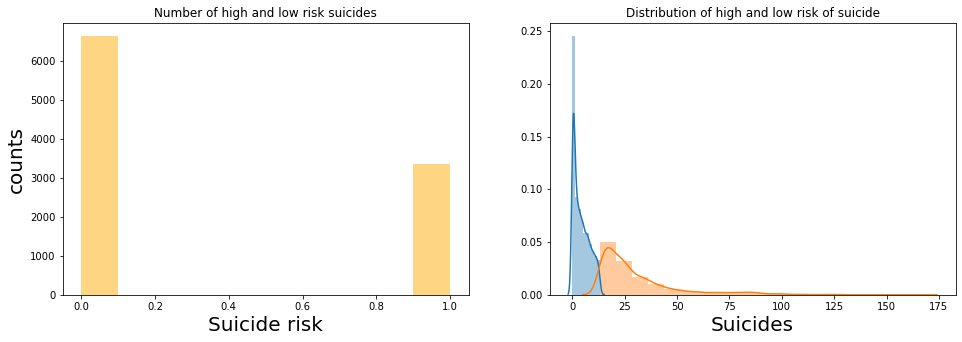

In [154]:
col = plt.cm.Spectral(np.linspace(0, 1, 22))
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(dataset1.risk, color=col[8])
plt.ylabel('counts', fontsize=20)
plt.xlabel('Suicide risk', fontsize=20)
plt.title("Number of high and low risk suicides")

plt.subplot(122)
sns.distplot(dataset1.suicidesper100k[dataset1.risk == 0], bins=10)#低风险
sns.distplot(dataset1.suicidesper100k[dataset1.risk == 1], bins=20)#高风险
plt.xlabel('Suicides', fontsize=20)
plt.title("Distribution of high and low risk of suicide")
plt.show()

In [155]:
#Use LabelEncoder class to convert categorical data into numerical one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset1.country=le.fit_transform(dataset1.country)
dataset1.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [156]:
dataset1.sex=le.fit_transform(dataset1.sex)

In [157]:
dataset1.age=le.fit_transform(dataset1.age)

In [158]:
dataset1.generation=le.fit_transform(dataset1.generation)